# Minkowski Distance

Minkowski distance is a generalized metric that serves as a flexible way to calculate the distance between two points in a multi-dimensional space. It encompasses both Euclidean and Manhattan distances as special cases, controlled by a parameter 'p'.

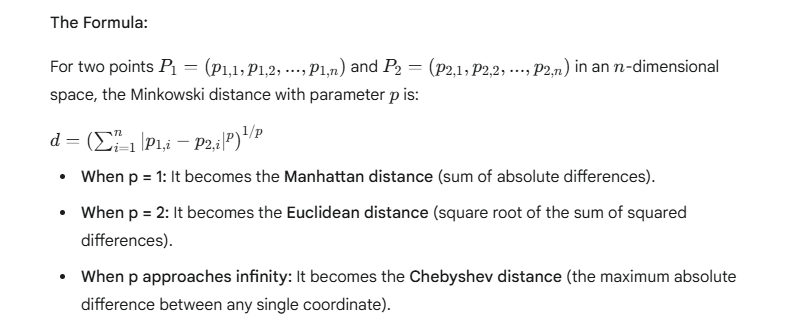

Example: Comparing Movie Ratings (with p=3)

Let's say we have two movie critics, Reviewer A and Reviewer B, and we want to compare their rating styles for three movies: "Action Movie", "Comedy Film", and "Drama Series". They rate movies on a scale of 1 to 10.

Reviewer A's Ratings:

* Action Movie: 8
* Comedy Film: 3
* Drama Series: 9
* So, Reviewer A's "point" is (8,3,9)

Reviewer B's Ratings:

* Action Movie: 6
* Comedy Film: 6
* Drama Series: 7
* So, Reviewer B's "point" is (6,6,7)

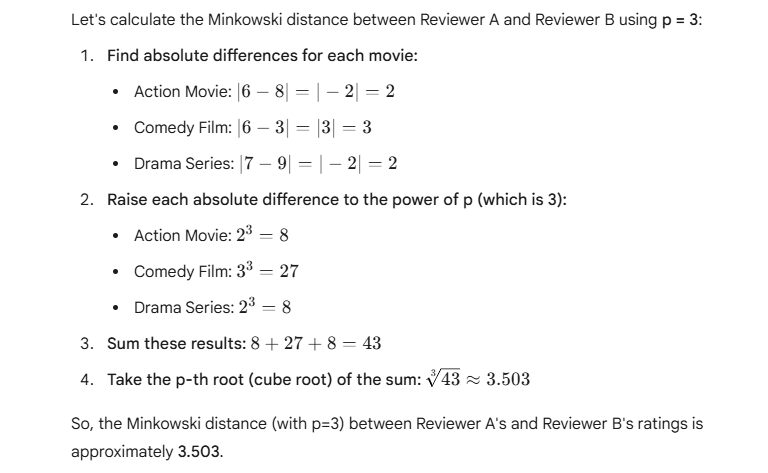

Interpretation:

The value of p in Minkowski distance influences how large differences are weighted.

* Smaller p (like p=1, Manhattan): Gives more importance to individual large differences across features.
* Larger p (like p=2, Euclidean, or p=3): Puts more emphasis on the largest differences, as squaring/cubing them makes them grow faster than smaller differences.

In this example, the Minkowski distance of 3.503 quantifies the overall dissimilarity between the two reviewers' rating styles. The choice of 'p' allows you to tune how the distance metric emphasizes or de-emphasizes differences across various dimensions.


# Notebook Structure

1. Import necessary libraries
2. Create the dataset
3. Utility function to calculate the Minkowski Distance
4. Choose a reference student
5. Calculating the Minkowski distance from reference student without applying standardization
6.Calculating the Minkowski distance from reference student after applying standardization

# 1. Import necessary libraries

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. Create the dataset

In [55]:
# 1. Create a dataset with 20 students and convert to DataFrame

np.random.seed(42) # for reproducibility

num_students = 20
data = {
    'Hours Studied': np.random.randint(5, 20, num_students),
    'Practice Questions': np.random.randint(30, 150, num_students),
    'Attendance Rate': np.random.randint(60, 100, num_students),
    'Prior Exam Score': np.random.randint(50, 95, num_students)
}

In [56]:
# Convert it into a dataframe and add a index

students_df = pd.DataFrame(data)
students_df.index = [f'Student_{i+1}' for i in range(num_students)]


In [57]:
print("Original Student Learning Pattern Data (DataFrame):")

students_df

Original Student Learning Pattern Data (DataFrame):


,Hours Studied,Practice Questions,Attendance Rate,Prior Exam Score
Student_1,11,51,87,84
Student_2,8,82,75,63
Student_3,17,31,74,66
Student_4,19,117,62,85
Student_5,15,137,96,89
Student_6,12,59,66,53
Student_7,17,67,80,51
Student_8,9,31,68,55
Student_9,11,93,98,91
Student_10,14,89,77,53


# 3. Utility function to calculate the Minkowski Distance

In [ ]:

def minkowski_distance(point1, point2, p):
    """
    Calculates the Minkowski distance between two n-dimensional points.
    p: The order of the norm (e.g., p=1 for Manhattan, p=2 for Euclidean).
    Assumes points are pandas Series or numpy arrays.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sum(np.abs(point1 - point2)**p)**(1/p)

# 4. Choose a reference student

In [ ]:
# Choose a reference student (e.g., the first student in the DataFrame)

reference_student_name = students_df.index[0]
reference_student_pattern = students_df.loc[reference_student_name]

# Choose a value for 'p' for Minkowski distance
minkowski_p = 3 # Using p=3 for this example

print(f"Reference Student for Comparison: {reference_student_name}")
print(f"Pattern: {reference_student_pattern.to_dict()}")
print(f"Minkowski 'p' parameter used: {minkowski_p}")
print("-" * 70)

Reference Student for Comparison: Student_1
Pattern: {'Hours Studied': 11, 'Practice Questions': 51, 'Attendance Rate': 87, 'Prior Exam Score': 84}
Minkowski 'p' parameter used: 3
----------------------------------------------------------------------


# 5. Calculating the Minkowski distance from reference student without applying standardization

In [ ]:
# 3. Calculate distance measure with one student and others WITHOUT standardization

print(f"--- Calculating Minkowski Distances (p={minkowski_p}) WITHOUT Standardization ---")
distances_no_std = {}
for student_name, pattern in students_df.iterrows():
    if student_name != reference_student_name:
        dist = minkowski_distance(reference_student_pattern, pattern, p=minkowski_p)
        distances_no_std[student_name] = dist

# Sort and print results
sorted_distances_no_std = sorted(distances_no_std.items(), key=lambda item: item[1])

print(f"\nClosest students to {reference_student_name} (WITHOUT standardization):")
for student, dist in sorted_distances_no_std[:5]: # Display top 5 closest
    print(f"- {student}: {dist:.2f}")
print("...")
for student, dist in sorted_distances_no_std[-5:]: # Display bottom 5 furthest
    print(f"- {student}: {dist:.2f}")
print("-" * 70)

--- Calculating Minkowski Distances (p=3) WITHOUT Standardization ---

Closest students to Student_1 (WITHOUT standardization):
- Student_15: 2.15
- Student_12: 18.44
- Student_11: 24.16
- Student_3: 25.33
- Student_18: 30.70
...
- Student_17: 67.04
- Student_4: 67.21
- Student_19: 69.65
- Student_5: 86.04
- Student_16: 87.47
----------------------------------------------------------------------


It is identifying which 5 students have the most similar study habits to the reference_student ('Student_1') and which 5 are the least similar, based on the raw, unscaled values of 'Hours Studied', 'Practice Questions', 'Attendance Rate', and 'Prior Exam Score'.

# 6.Calculating the Minkowski distance from reference student after applying standardization

### A. Standardize the dataframe

In [ ]:

# Standardize the entire DataFrame

scaler = StandardScaler()
students_scaled_array = scaler.fit_transform(students_df)
students_scaled_df = pd.DataFrame(students_scaled_array, columns=students_df.columns, index=students_df.index)

print("\nScaled Student Learning Pattern Data (DataFrame ):")

students_scaled_df


Scaled Student Learning Pattern Data (DataFrame ):


,Hours Studied,Practice Questions,Attendance Rate,Prior Exam Score
Student_1,-0.307661,-0.998752,1.042323,0.892015
Student_2,-1.186694,-0.020511,-0.074452,-0.649739
Student_3,1.450404,-1.629875,-0.167516,-0.429489
Student_4,2.036425,1.083954,-1.284291,0.965432
Student_5,0.864382,1.715076,1.879904,1.259099
Student_6,-0.014651,-0.746303,-0.912032,-1.383908
Student_7,1.450404,-0.493854,0.390871,-1.530742
Student_8,-0.893683,-1.629875,-0.725903,-1.237074
Student_9,-0.307661,0.326606,2.066033,1.405933
Student_10,0.571371,0.200382,0.111677,-1.383908


### B. Choose the reference student

In [ ]:
# Get the scaled pattern for the reference student

reference_student_scaled_pattern = students_scaled_df.loc[reference_student_name]

print(f"Reference Student (Scaled) for Comparison: {reference_student_name}")
print(f"Pattern: {reference_student_scaled_pattern.apply(lambda x: f'{x:.2f}').to_dict()}")
print(f"Minkowski 'p' parameter used: {minkowski_p}")
print("-" * 70)

Reference Student (Scaled) for Comparison: Student_1
Pattern: {'Hours Studied': '-0.31', 'Practice Questions': '-1.00', 'Attendance Rate': '1.04', 'Prior Exam Score': '0.89'}
Minkowski 'p' parameter used: 3
----------------------------------------------------------------------


### C. Calculate the Minkowski Distance and most 5 and least 5 similar students from reference student

In [ ]:

distances_std = {}
for student_name, pattern in students_scaled_df.iterrows():
    if student_name != reference_student_name:
        dist = minkowski_distance(reference_student_scaled_pattern, pattern, p=minkowski_p)
        distances_std[student_name] = dist

# Sort and print results
sorted_distances_std = sorted(distances_std.items(), key=lambda item: item[1])

print(f"\nClosest students to {reference_student_name} (WITH standardization):")
for student, dist in sorted_distances_std[:5]: # Display top 5 closest
    print(f"- {student}: {dist:.2f}")
print("...")
for student, dist in sorted_distances_std[-5:]: # Display bottom 5 furthest
    print(f"- {student}: {dist:.2f}")
print("-" * 70)

print("\n--- Comparison of Results ---")
print(f"Minkowski distance, especially with p={minkowski_p}, is sensitive to feature scales.")
print("You'll notice that the absolute distance values change significantly after standardization.")
print("The ordering of similar students might also change, demonstrating that standardization is crucial for a balanced and accurate measure of similarity across all features, regardless of their original ranges.")


Closest students to Student_1 (WITH standardization):
- Student_15: 0.32
- Student_12: 1.26
- Student_9: 1.52
- Student_18: 1.63
- Student_2: 1.88
...
- Student_6: 2.68
- Student_7: 2.72
- Student_5: 2.81
- Student_4: 3.26
- Student_16: 3.44
----------------------------------------------------------------------

--- Comparison of Results ---
Minkowski distance, especially with p=3, is sensitive to feature scales.
You'll notice that the absolute distance values change significantly after standardization.
The ordering of similar students might also change, demonstrating that standardization is crucial for a balanced and accurate measure of similarity across all features, regardless of their original ranges.


# Interpretation

Minkowski distance absolutely requires standardization. Minkowski distance is a generalized metric that encompasses both Euclidean and Manhattan distances (and more) by introducing a parameter 'p'. Since both Euclidean distance (p=2) and Manhattan distance (p=1) are susceptible to the influence of feature scales, their generalization, Minkowski distance, inherits this sensitivity. Therefore, to ensure that no single feature's large numerical range disproportionately impacts the calculated distance, standardizing the data is crucial before applying Minkowski distance.